# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** Jakub Koziński

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [3]:
# ===== Twoja implementacja tutaj =====
f1 = lambda x: np.sign(x) * x + x**2

f2 = lambda x: np.sign(x) * x**2

f3 = lambda x: np.abs(np.sin(5*x))**3

f4_1   = lambda x: 1 / (1 + 1*x**2)
f4_25  = lambda x: 1 / (1 + 25*x**2)
f4_100 = lambda x: 1 / (1 + 100*x**2)

f5 = lambda x: np.sign(x)

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


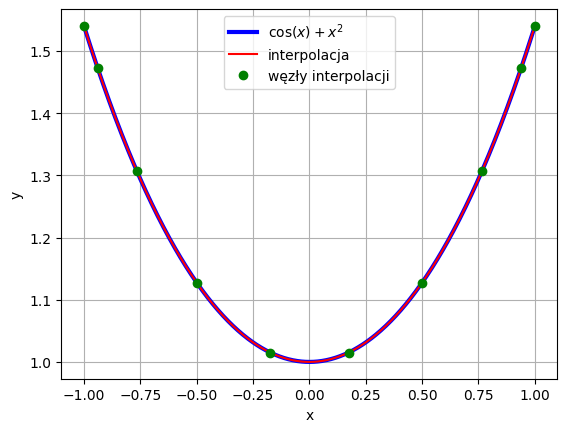

In [4]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

Czas dla inetrpolacji metodą z biblioteki sp dla n = 10, wynosi t = 0.00069 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.11011227778498285
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 10, wynosi t = 0.01442 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.11011227778498282


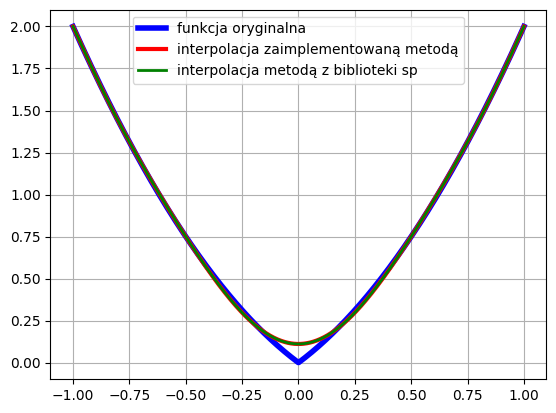

Czas dla inetrpolacji metodą z biblioteki sp dla n = 100, wynosi t = 0.00159 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.009124053856609063
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 100, wynosi t = 0.01200 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.009124053856609072


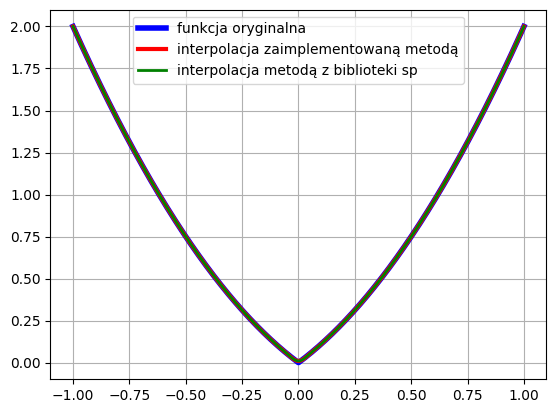

Czas dla inetrpolacji metodą z biblioteki sp dla n = 1000, wynosi t = 0.01980 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.00023808283885502724
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 1000, wynosi t = 0.01953 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.00023808283885475554


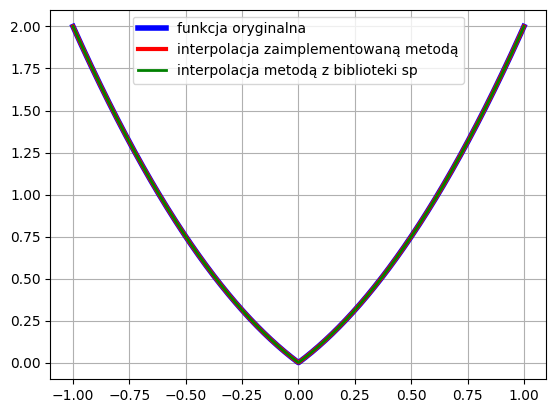

Czas dla inetrpolacji metodą z biblioteki sp dla n = 10000, wynosi t = 0.43624 s
Jakość normy dla interpolacji metodą z biblioteki sp: 1.85334536835567e-06
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 10000, wynosi t = 0.04410 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 1.853345368676377e-06


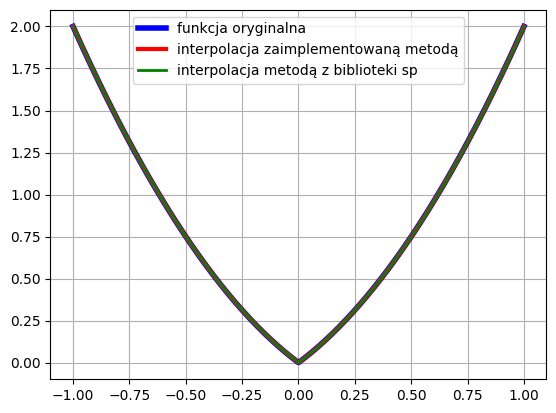

Czas dla inetrpolacji metodą z biblioteki sp dla n = 100000, wynosi t = 38.91500 s
Jakość normy dla interpolacji metodą z biblioteki sp: 2.233721777423342e-09
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 100000, wynosi t = 0.35627 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 2.2337183201194544e-09


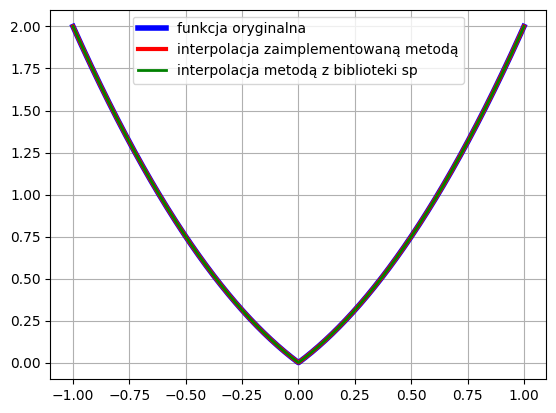

In [12]:
# ===== Twoja implementacja tutaj =====
import time
x = np.linspace(-1, 1, 1000)
n = [1,2,3,4,5]
for i in n:
    nodes = int(10**i)
    xch = main.chebyshev_nodes(nodes)
    weights = main.bar_cheb_weights(nodes)
    
    start_time = time.time()
    ysp = sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    end_time = time.time()
    duration_sp = end_time - start_time
    print(f'Czas dla inetrpolacji metodą z biblioteki sp dla n = {nodes}, wynosi t = {duration_sp:.5f} s')
    print(f'Jakość normy dla interpolacji metodą z biblioteki sp: {main.L_inf(f1(x),ysp)}')
    
    start_time = time.time()
    yinterp = main.barycentric_inte(xch, f1(xch),  weights, x)
    end_time = time.time()
    duration_own = end_time - start_time
    print(f'Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = {nodes}, wynosi t = {duration_own:.5f} s')
    print(f'Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: {main.L_inf(f1(x),yinterp)}')
    
    plt.plot(x, f1(x), 'b', linewidth=4, label="funkcja oryginalna")
    plt.plot(x, yinterp, 'r', linewidth=3, label='interpolacja zaimplementowaną metodą')
    plt.plot(x, ysp, 'g', linewidth=2, label='interpolacja metodą z biblioteki sp')
    plt.grid()
    plt.legend()
    plt.show()

Wraz ze zwiększaniem liczby węzłów interpolacja stawała się coraz dokładniejsza. Przy 𝑛 = 100000 błąd osiągnął poziom rzędu 10^−9, co potwierdza oczekiwaną poprawę jakości przy większym n. Warto też zauważyć, że dla 𝑛 = 100000 czas działania metody z biblioteki sp okazał się około 26 razy dłuższy niż czas potrzebny na obliczenia wykonane własną implementacją. Oznacza to, że przy bardzo dużych zbiorach danych podejście macierzowe może zapewniać znacznie lepszą wydajność.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

<>:42: SyntaxWarning: invalid escape sequence '\i'
<>:42: SyntaxWarning: invalid escape sequence '\i'
C:\Users\kukoz\AppData\Local\Temp\ipykernel_14364\2823612448.py:42: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel("Norma $L_\infty$")


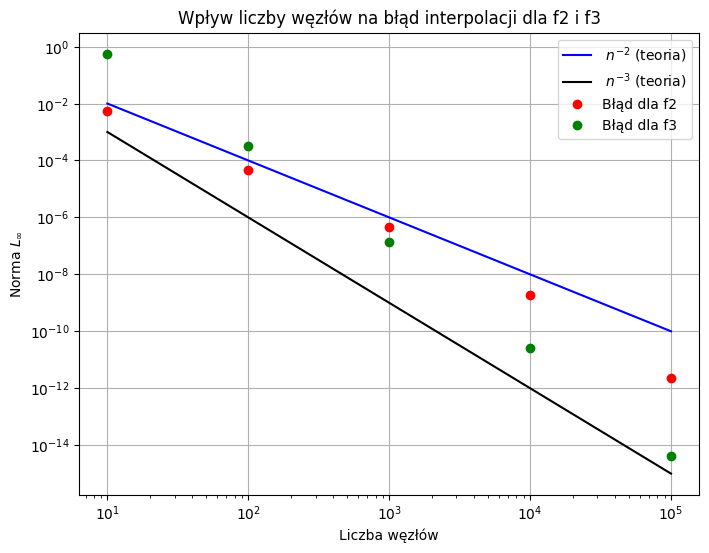

In [ ]:
# ===== Twoja implementacja tutaj =====
import time
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 1000)

node_counts = []
errors_f2 = []
errors_f3 = []
theo_f2 = []
theo_f3 = []

powers = [1, 2, 3, 4, 5]

for p in powers:
    N = 10**p
    node_counts.append(N)
    
    theo_f2.append(N**(-2))
    theo_f3.append(N**(-3))

    x_nodes = main.chebyshev_nodes(N)
    w_nodes = main.bar_cheb_weights(N)

    interp_f2 = main.barycentric_inte(x_nodes, f2(x_nodes), w_nodes, x)
    interp_f3 = main.barycentric_inte(x_nodes, f3(x_nodes), w_nodes, x)

    errors_f2.append(main.L_inf(f2(x), interp_f2))
    errors_f3.append(main.L_inf(f3(x), interp_f3))


plt.figure(figsize=(8,6))
plt.plot(node_counts, theo_f2, 'b-', label=r'$\;n^{-2}$ (teoria)')
plt.plot(node_counts, theo_f3, 'k-', label=r'$\;n^{-3}$ (teoria)')

plt.plot(node_counts, errors_f2, 'ro', label='Błąd dla f2')
plt.plot(node_counts, errors_f3, 'go', label='Błąd dla f3')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Liczba węzłów")
plt.ylabel("Norma $L_\infty$")
plt.title("Wpływ liczby węzłów na błąd interpolacji dla f2 i f3")
plt.grid(True)
plt.legend()
plt.show()

Wraz ze wzrostem liczby węzłów błąd interpolacji systematycznie maleje dla obu funkcji, co potwierdza poprawność metody barycentrycznej oraz zgodność z teorią aproksymacji. Gładkość funkcji jest ograniczona, a przewidywany rząd zbieżności rzeczywiście się realizuje. Funkcja f3 wykazuje szybszą zbieżność. Jej błędy leżą blisko teoretycznej liniowej zależności. Im bardziej gładka funkcja, tym szybciej maleje błąd interpolacji. f3 jest bardziej regularna niż f2, dlatego osiąga mniejsze błędy już przy umiarkowanej liczbie węzłów. Dla dużych wartości 
𝑛 błędy osiągają bardzo małe poziomy, co pokazuje, że interpolacja w węzłach Czebyszewa jest wyjątkowo skuteczna i stabilna numerycznie.

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

Średni minimalny błąd (n parzyste): 0.93092
Średni minimalny błąd (n nieparzyste): 1.95701


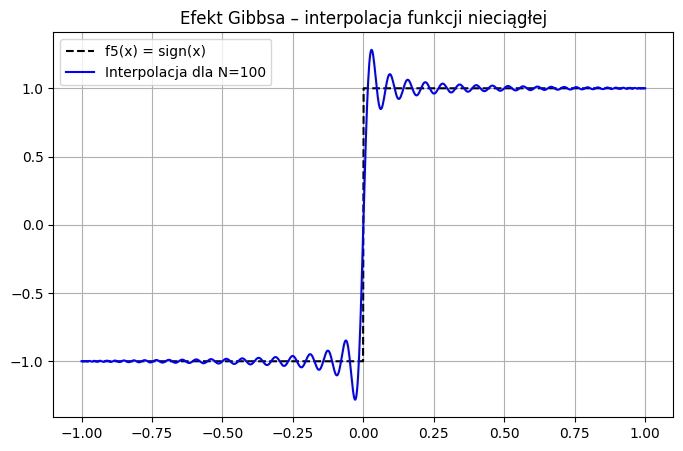

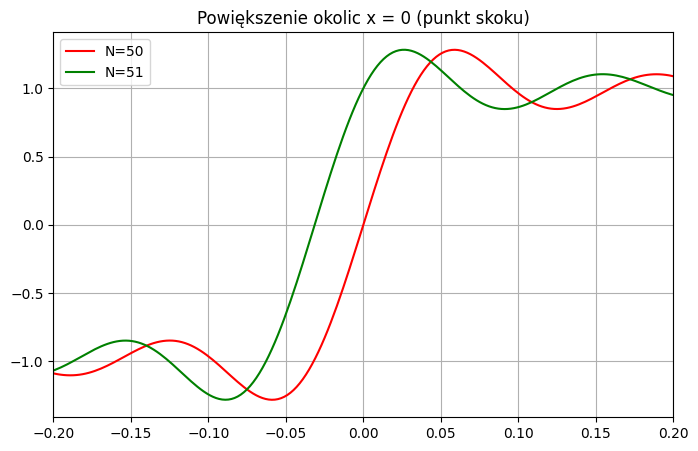

In [ ]:
# ===== Twoja implementacja tutaj =====
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-1, 1, 1000)

bledy_parz = []
bledy_nparz = []

for n in range(20, 100):

    wezly = main.chebyshev_nodes(n)
    wagi = main.bar_cheb_weights(n)

    interp = main.barycentric_inte(wezly, f5(wezly), wagi, xx)
    blad = main.L_inf(f5(xx), interp)

    (bledy_parz if n % 2 == 0 else bledy_nparz).append(blad)

srednia_p = np.mean(bledy_parz[-5:])
srednia_np = np.mean(bledy_nparz[-5:])

print(f"Średni minimalny błąd (n parzyste): {srednia_p:.5f}")
print(f"Średni minimalny błąd (n nieparzyste): {srednia_np:.5f}")


N_show = 100
wezly100 = main.chebyshev_nodes(N_show)
wagi100 = main.bar_cheb_weights(N_show)
interp100 = main.barycentric_inte(wezly100, f5(wezly100), wagi100, xx)

plt.figure(figsize=(8,5))
plt.plot(xx, f5(xx), 'k--', label="f5(x) = sign(x)")
plt.plot(xx, interp100, 'b', label=f"Interpolacja dla N={N_show}")
plt.title("Efekt Gibbsa – interpolacja funkcji nieciągłej")
plt.grid(True)
plt.legend()


plt.figure(figsize=(8,5))

for N_test, col in [(50, 'r'), (51, 'g')]:
    wezlyT = main.chebyshev_nodes(N_test)
    wagiT = main.bar_cheb_weights(N_test)
    interpT = main.barycentric_inte(wezlyT, f5(wezlyT), wagiT, xx)
    plt.plot(xx, interpT, col, label=f"N={N_test}")

plt.xlim(-0.2, 0.2)
plt.title("Powiększenie okolic x = 0 (punkt skoku)")
plt.grid(True)
plt.legend()

plt.show()


Interpolacja barycentryczna w węzłach Czebyszewa radzi sobie bardzo dobrze dla funkcji gładkich, lecz dla funkcji nieciągłych jej błąd w pobliżu skoku jest nieunikniony. Efekt Gibbsa jest widoczny niezależnie od liczby węzłów, a wybór liczby parzystej pozwala jedynie zmniejszyć, ale nie wyeliminować oscylacje.

---

## WNIOSKI
Przeprowadzone doświadczenia potwierdziły, że interpolacja barycentryczna w węzłach Czebyszewa jest efektywną i stabilną numerycznie metodą aproksymacji funkcji gładkich. Zarówno implementacja własna, jak i funkcja dostępna w bibliotece scipy poprawnie odtwarzają przebieg interpolowanych funkcji, natomiast biblioteczna wersja okazuje się znacznie szybsza dzięki wykorzystaniu zoptymalizowanych operacji macierzowych. W przypadku bardzo dużych rzędów interpolacji różnice czasowe stają się wyraźne — scipy działa wielokrotnie szybciej, zachowując tę samą jakość wyników.

Analiza błędów dla funkcji różniczkowalnych (f₂ i f₃) potwierdziła teoretyczne przewidywania: im wyższa gładkość funkcji, tym szybciej zanika błąd interpolacji. 

W przypadku funkcji nieciągłej f₅ pojawił się klasyczny efekt Gibbsa — oscylacje w pobliżu punktu skoku, które nie znikają nawet przy zwiększaniu liczby węzłów. Interpolacja dobrze odwzorowuje funkcję daleko od nieciągłości, lecz w okolicy 𝑥 = 0 pojawia się nadstrzał, którego amplituda jest praktycznie nieusuwalna. Dodatkowo zauważono, że wynik zależy od parzystości liczby węzłów: dla wartości parzystych błąd minimalny jest wyraźnie mniejszy. Wynika to z faktu, że przy liczbie parzystej punkt nieciągłości nie pokrywa się z żadnym węzłem interpolacji, co ogranicza lokalne zaburzenia.

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)